<a href="https://colab.research.google.com/github/JMCastle98/M4_Analisis_de_Datos_con_Python/blob/main/Postwork03/Postwork03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Postwork 3: Exploración de Variables Categóricas y Análisis Multivariable

Las variables categóricas nos permiten realizar un análisis de frecuencias tomando en cuenta dichas categorías.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df_clean = pd.read_csv("https://raw.githubusercontent.com/JMCastle98/M4_Analisis_de_Datos_con_Python/main/Dataset/pok%C3%A9dex_clean.csv", index_col=0)

Veamos las variables de nuestro dataset que son de tipo "objeto", las cuales serán nuestras variables categóricas:

In [2]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  1045 non-null   int64  
 1   name            1045 non-null   object 
 2   generation      1045 non-null   int64  
 3   status          1045 non-null   object 
 4   species         1045 non-null   object 
 5   type_number     1045 non-null   int64  
 6   type_1          1045 non-null   object 
 7   type_2          1045 non-null   object 
 8   height_m        1045 non-null   float64
 9   weight_kg       1045 non-null   float64
 10  total_points    1045 non-null   int64  
 11  hp              1045 non-null   int64  
 12  attack          1045 non-null   int64  
 13  defense         1045 non-null   int64  
 14  sp_attack       1045 non-null   int64  
 15  sp_defense      1045 non-null   int64  
 16  speed           1045 non-null   int64  
 17  catch_rate      1045 non-null   f

En el mundo pokémon existen 18 tipos diferentes, siendo la mejor forma de categorizarlos, después podemos ordenarlos por otros aspectos como el hecho de ser o no pokémon legendarios, la generación en la que fueron introducidos, su ratio de crecimiento o inclusive el ratio de captura para conocer a los pokemon más difíciles de capturar.

In [3]:
df_clean['generation'].unique()

array([1, 8, 2, 3, 4, 5, 6, 7])

In [4]:
df_clean['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [5]:
df_clean['type_2'].unique()

array(['Poison', 'None', 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel',
       'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [6]:
df_clean['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [7]:
df_clean['growth_rate'].unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Fluctuating',
       'Erratic'], dtype=object)

In [8]:
df_clean['catch_rate'].unique() #Es más una variable discreta

array([ 45., 255., 120., 127.,  90., 190.,  75., 235., 150.,  25., 170.,
        50., 200., 100., 180.,  60., 225.,  30.,  35.,   3.,  65.,  70.,
       125., 205., 155.,   5., 145., 130., 140.,  15., 220., 160.,  80.,
        55.,  10.])

Nos quedaremos entonces con los tipos, generación, estatus y ratios de crecimiento como variables categóricas. Realizemos un conteo para saber las frecuencias:


In [9]:
type1_counts = df_clean['type_1'].value_counts();
type2_counts = df_clean['type_2'].value_counts();
generation_counts = df_clean['generation'].value_counts();
status_counts = df_clean['status'].value_counts();
growth_rate_counts = df_clean['growth_rate'].value_counts();

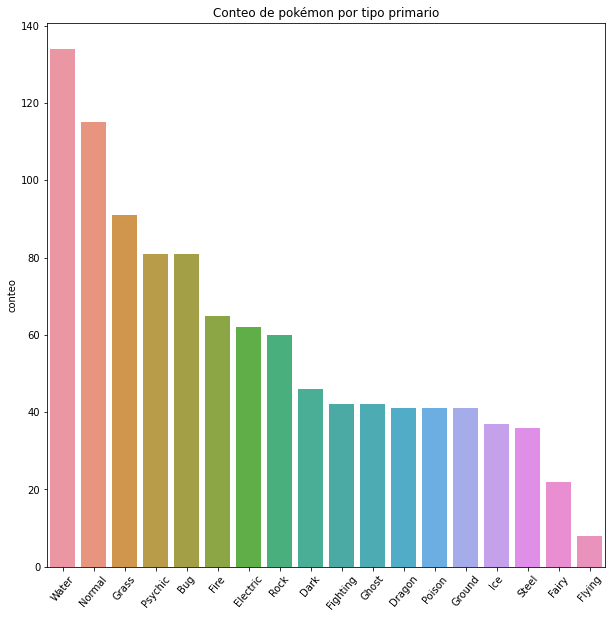

In [10]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x = type1_counts.index, y = type1_counts)
ax.set_title('Conteo de pokémon por tipo primario')
ax.set(ylabel='conteo');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);

Con esta visualización observamos cuantos pokémon hay de cada tipo en la pokédex, siendo el tipo agua el más común y el tipo volador como el menos común.

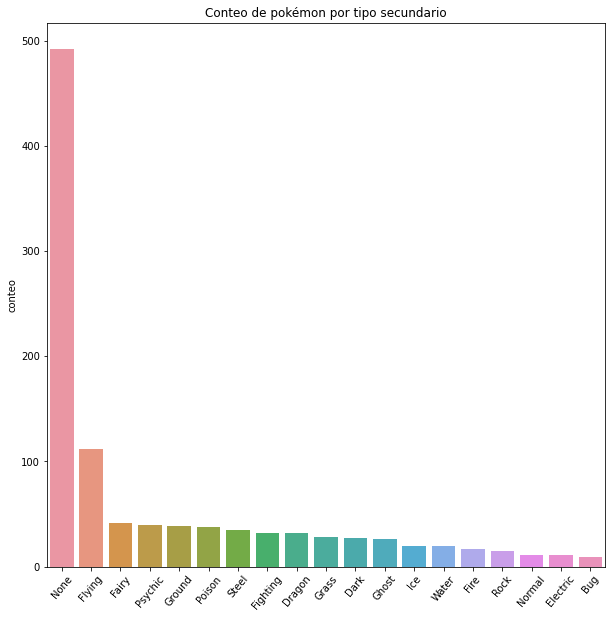

In [11]:
plt.figure(figsize=(10, 10));
ax = sns.barplot(x = type2_counts.index, y = type2_counts);
ax.set_title('Conteo de pokémon por tipo secundario');
ax.set(ylabel='conteo');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);

Tenemos una gran cantidad de pokémon sin un tipo secundario (pokémon puros), veamos el conteo dejándolos de lado:

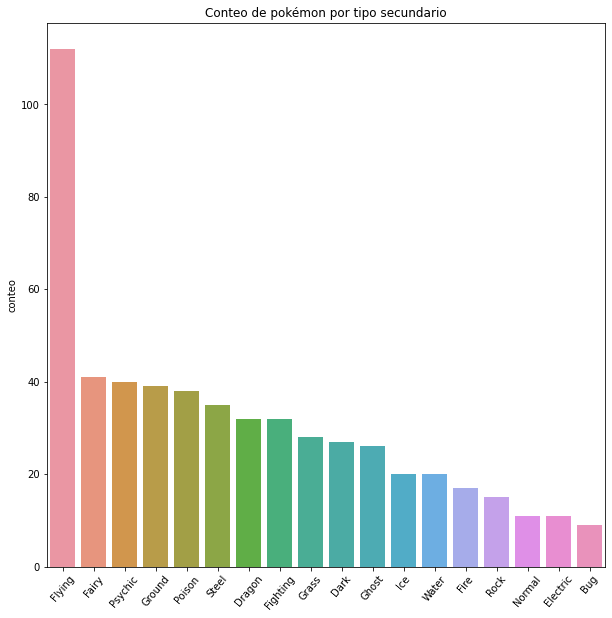

In [12]:
df_clean_aux = df_clean[ df_clean['type_2'] != 'None' ]
type2_counts_clean = df_clean_aux['type_2'].value_counts();
plt.figure(figsize=(10, 10))
ax = sns.barplot( x = type2_counts_clean.index, y = type2_counts_clean)
ax.set_title('Conteo de pokémon por tipo secundario')
ax.set(ylabel='conteo');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50);

El tipo volador se lleva la delantera como tipo secundario más popular, dejando al tipo bicho como el menos popular.

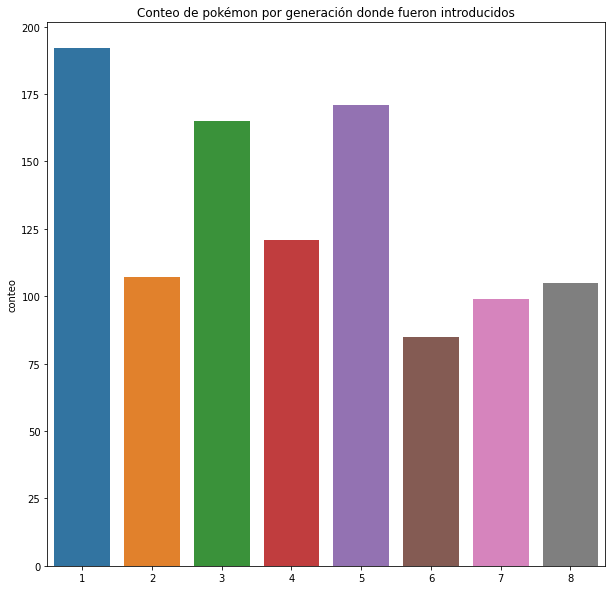

In [13]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x = generation_counts.index, y = generation_counts)
ax.set_title('Conteo de pokémon por generación donde fueron introducidos')
ax.set(ylabel='conteo');

Ok, sé lo que están pensando, en la primer generación debería haber sólo 151 pokémon, no? Pues esto es relativamente cierto, si no contamos las formas regionales, dinamax y Mega de algunos pokémon, esto eleva los número en algunos casos. La sexta generación se quedó bastante corta, siendo la que menos pokémon nuevos introdujo.

<p align="center">
<img src="https://i.ytimg.com/vi/5VPXglnztEM/maxresdefault.jpg"  height ="200" width = "300">
<p>

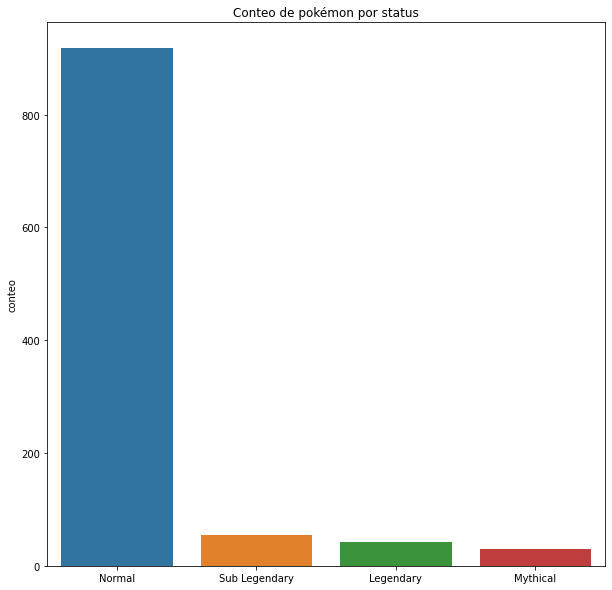

In [14]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x = status_counts.index, y = status_counts)
ax.set_title('Conteo de pokémon por status')
ax.set(ylabel='conteo');

Era de esperarse que hubieran pocos pokemon legendarios o miticos, si ignoramos a los pokemon "normales":

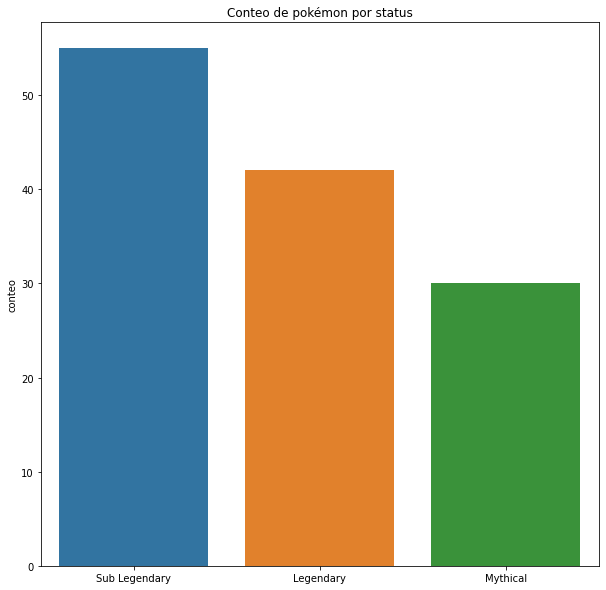

In [15]:
df_clean_aux = df_clean[ df_clean['status'] != 'Normal' ]
status_counts_clean = df_clean_aux['status'].value_counts();
plt.figure(figsize=(10, 10))
ax = sns.barplot( x = status_counts_clean.index, y = status_counts_clean)
ax.set_title('Conteo de pokémon por status')
ax.set(ylabel='conteo');

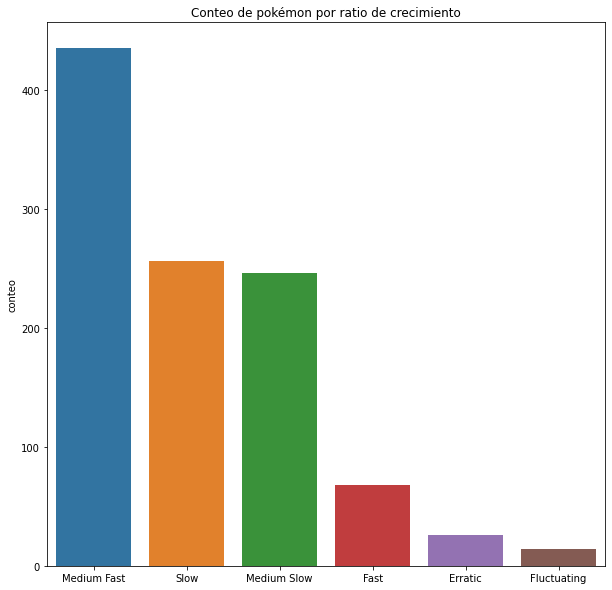

In [16]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x = growth_rate_counts.index, y = growth_rate_counts)
ax.set_title('Conteo de pokémon por ratio de crecimiento')
ax.set(ylabel='conteo');

Finalmente, observamos que los pokémon más fáciles de entrenar abudandan y que los más díficiles son pocos. Ahora bien, como maestros pokémon, nos puede interesar información como: En general, ¿Los pokémon más raros de que tipos son? Para responder a esta pregunta haremos uso de tablas de contingencia que realicen el conteo de frecuencia por nosotros en base a variables categóricas:

In [17]:
pd.crosstab(df_clean['type_1'],df_clean['status'], margins=True, margins_name= 'total')

status,Legendary,Mythical,Normal,Sub Legendary,total
type_1,,,,,
Bug,0,1,78,2,81
Dark,1,2,41,2,46
Dragon,10,0,26,5,41
Electric,0,1,54,7,62
Fairy,3,0,19,0,22
Fighting,2,1,35,4,42
Fire,1,1,59,4,65
Flying,0,0,6,2,8
Ghost,2,0,39,1,42


Con los totales observamos la información que se reflejaban en las gráficas de barra, sin embargo una crosstab nos brinda información más específica. Ahora sabemos que los pokémon de tipo dragón y tipo psíquico tienen más legendarios que el resto. En el caso del tipo secundario:

In [18]:
pd.crosstab(df_clean['type_2'],df_clean['status'], margins=True, margins_name= 'total')

status,Legendary,Mythical,Normal,Sub Legendary,total
type_2,,,,,
Bug,0,0,9,0,9
Dark,0,1,25,1,27
Dragon,7,0,23,2,32
Electric,1,0,10,0,11
Fairy,0,3,34,4,41
Fighting,1,3,23,5,32
Fire,2,1,14,0,17
Flying,5,1,95,11,112
Ghost,3,2,20,1,26


En este caso, el valor None en el tipo secundario nos viene de perlas, ahora sabemos que hay 11 pokémon legendarios un tipo puro, 22 sub-legendarios y 13 míticos. Analizemos el ratio de crecimiento de los pokémon de acuerdo a su status:

In [19]:
pd.crosstab(df_clean['growth_rate'],df_clean['status'],margins=True, margins_name= 'total' )

status,Legendary,Mythical,Normal,Sub Legendary,total
growth_rate,,,,,
Erratic,0,0,26,0,26
Fast,0,0,68,0,68
Fluctuating,0,0,14,0,14
Medium Fast,0,0,435,0,435
Medium Slow,0,4,242,0,246
Slow,42,26,133,55,256
total,42,30,918,55,1045


Como sospechabamos, los pokémon más raros son los más dificiles de entrenar, finalmente veamos un crosstab más complicado:

In [20]:
pd.crosstab(df_clean['status'],[df_clean['generation'], df_clean['type_1'] ] ,margins=True, margins_name= 'total' )

generation      1                             ...       8                  total
type_1        Bug Dark Dragon Electric Fairy  ... Psychic Rock Steel Water      
status                                        ...                               
Legendary       0    0      0        0     0  ...       3    0     0     0    42
Mythical        0    0      0        0     0  ...       0    0     0     0    30
Normal         14    4      3       10     2  ...       7    4     4     9   918
Sub Legendary   0    0      0        1     0  ...       1    0     0     0    55
total          14    4      3       11     2  ...      11    4     4     9  1045

[5 rows x 135 columns]

Tenemos un acercamiento al numero de pokémon por tipo primario que fueron introducidos en las diferentes generaciones. Utilicemos dos crosstab y creemos visualizaciones que nos permiten observar mejor la distribución por categorías:

In [21]:
crosstab1 = pd.crosstab(df_clean['type_1'],df_clean['status'])
crosstab2 = pd.crosstab(df_clean['generation'],df_clean['status'])

El primer crosstab hace un conteo de los tipos por estatus del pokémon y el segundo hace un conteo de pokémon en las diferentes generaciones por estatus, si graficamos estos elementos:

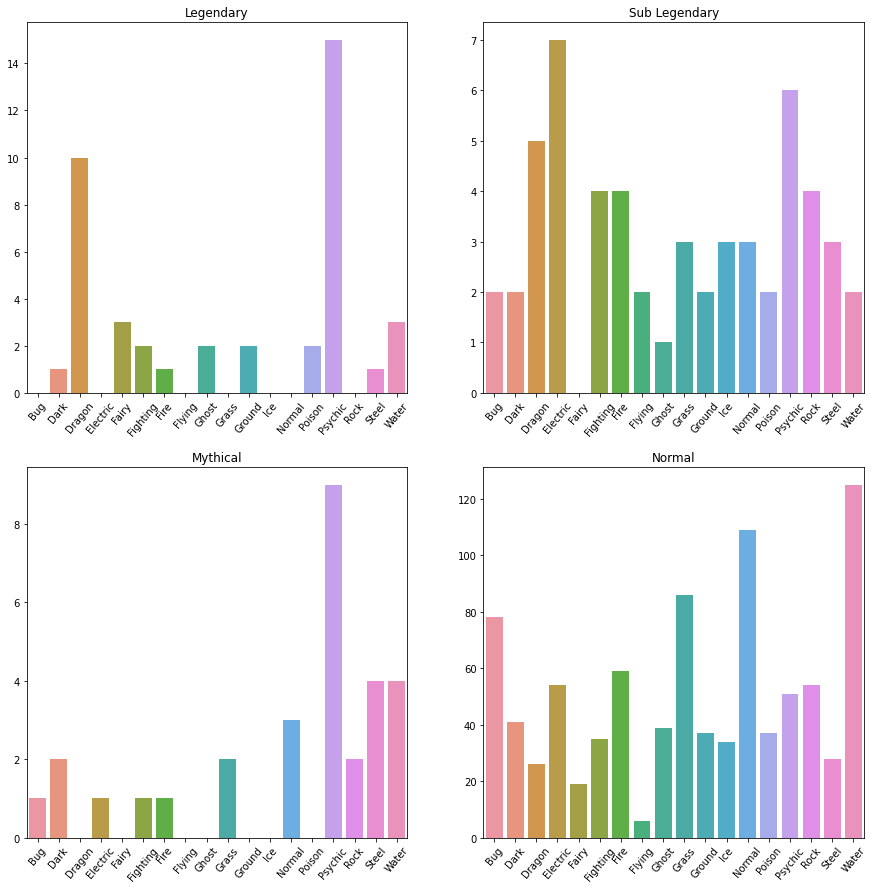

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

index = crosstab1.index

sns.barplot(x = index, y = crosstab1.loc[:,'Legendary'], ax=axes[0, 0])
sns.barplot(x = index, y = crosstab1.loc[:,'Sub Legendary'], ax=axes[0, 1])
sns.barplot(x = index, y = crosstab1.loc[:,'Mythical'], ax=axes[1, 0])
sns.barplot(x = index, y = crosstab1.loc[:,'Normal'], ax=axes[1, 1])

axes[0,0].set(xlabel='', ylabel='', title='Legendary')
axes[0,1].set(xlabel='', ylabel='', title='Sub Legendary')
axes[1,0].set(xlabel='', ylabel='', title='Mythical')
axes[1,1].set(xlabel='', ylabel='', title='Normal')

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation = 50);
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation = 50);
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 50);
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation = 50);

fig.suptitle('', fontsize=15);

Los resultados a los que podemos llegar son similares a los que obtuvimos al observar únicamente la tabla, pero un gráfico de barras es mucho más sencillo de leer y más llamativo.

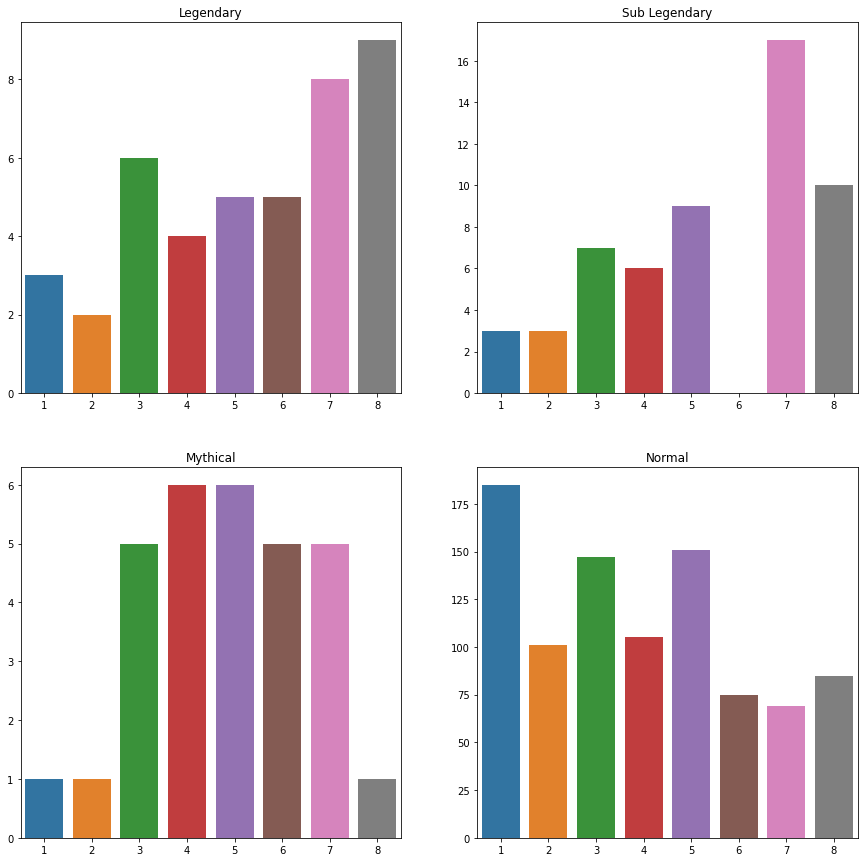

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

index = crosstab2.index

sns.barplot(x = index, y = crosstab2.loc[:,'Legendary'], ax=axes[0, 0])
sns.barplot(x = index, y = crosstab2.loc[:,'Sub Legendary'], ax=axes[0, 1])
sns.barplot(x = index, y = crosstab2.loc[:,'Mythical'], ax=axes[1, 0])
sns.barplot(x = index, y = crosstab2.loc[:,'Normal'], ax=axes[1, 1])

axes[0,0].set(xlabel='', ylabel='', title='Legendary')
axes[0,1].set(xlabel='', ylabel='', title='Sub Legendary')
axes[1,0].set(xlabel='', ylabel='', title='Mythical')
axes[1,1].set(xlabel='', ylabel='', title='Normal')


fig.suptitle('', fontsize=15);

Observamos el número de pokémon por estatus que fueron introducidos en cada generación, la octava generación fue bastante generosa con sus legendarios y la sexta no incluyo sub-legendarios. Para observar la concentración de los datos en diferentes categorías definimos la siguiente función, esta toma los df filtrados con el IQR-Score:

In [27]:
def boxplot_categorico(campo,titulo,rotation):
    plt.figure(figsize=(10, 10))
    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    #De las 8 variables numericos tomamos como ejemplo estas 3

    sns.boxplot(data= IQR_df('height_m') , x=campo, y='height_m', ax=axes[0]);
    sns.boxplot(data= IQR_df('weight_kg') , x=campo, y='weight_kg', ax=axes[1]);
    sns.boxplot(data= IQR_df('total_points') , x=campo, y='total_points', ax=axes[2]);
    
    axes[0].set(xlabel='', ylabel='', title='Altura')
    axes[1].set(xlabel='', ylabel='', title='Peso')
    axes[2].set(xlabel='', ylabel='', title='Puntos totales')

    axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = rotation);
    fig.suptitle(f'Características de los pokémon por {titulo}', fontsize=15);   

def IQR_df(campo):
    iqr = df_clean[campo].quantile(0.75) - df_clean[campo].quantile(0.25)
    quantil25= df_clean[campo].quantile(0.25) - (iqr * 1.5)
    quantil75= df_clean[campo].quantile(0.75) + (iqr * 1.5)
    filtro_inferior = df_clean[campo] > quantil25
    filtro_superior = df_clean[campo] < quantil75
    
    df_filtrado = df_clean[filtro_inferior & filtro_superior]

    return df_filtrado
 

Elegimos altura, peso y puntos totales como aquellas que describen mejor las características de un pokémon:

<Figure size 720x720 with 0 Axes>

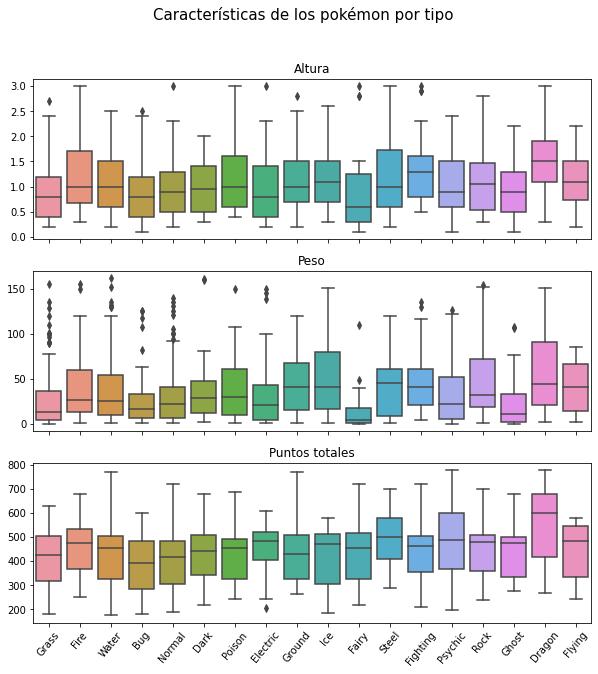

In [28]:
boxplot_categorico('type_1','tipo',50)

Encontramos información muy interesante:
- El tipo dragón suele tener valores más altos de altura, peso y puntos.
- El tipo planta y el tipo hada corresponde a pokémon pequeños.
- A pesar de que hay muchos pokémon tipo agua, sus puntos totales están concentrados en valores "normales".

<Figure size 720x720 with 0 Axes>

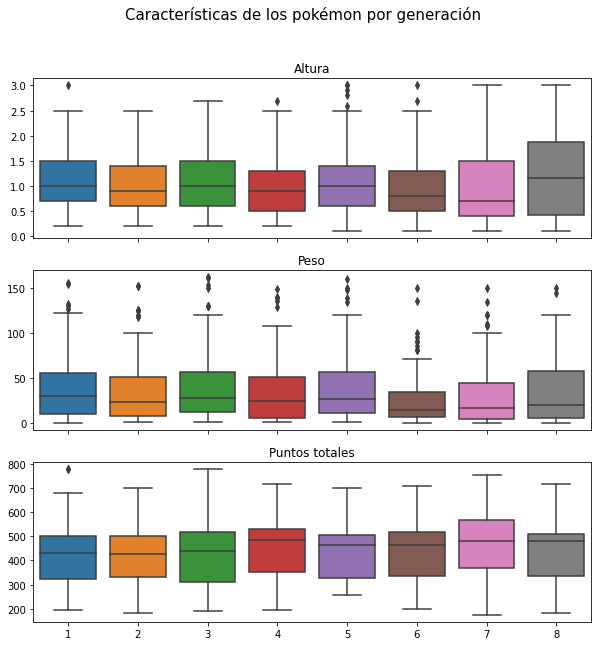

In [29]:
boxplot_categorico('generation','generación',0)

Si hablamos de generaciones:
- La séptima nos brindó los pokémon con el mayor rango de puntos totales y la mediana más alta junto a la octava generación. 
- La cuarta generación nos dió a los pokémon más chiquitos  y la sexta a los más ligeros.
- Los pokémon más altos están en la octava generación, esto debido a la introducción de la forma Dinamax.


<p align="center">
<img src="https://i.ytimg.com/vi/6ACFHh-lRKo/maxresdefault.jpg"  height ="200" width = "300">
<p>

Para finalizar, veamos distribuciones categóricas con la ayuda de violinplots:

In [30]:
def violinplot_categorico(campo,titulo):
    plt.figure(figsize=(10, 10))
    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    #De las 8 variables numericos tomamos como ejemplo estas 3

    sns.violinplot(data= IQR_df('hp') , x=campo, y='hp', ax=axes[0]);
    sns.violinplot(data= IQR_df('attack') , x=campo, y='attack', ax=axes[1]);
    sns.violinplot(data= IQR_df('defense') , x=campo, y='defense', ax=axes[2]);
    
    axes[0].set(xlabel='', ylabel='', title='Vida')
    axes[1].set(xlabel='', ylabel='', title='Ataque')
    axes[2].set(xlabel='', ylabel='', title='Defensa')

    fig.suptitle(f'Estadisticas de los pokemon por {titulo}', fontsize=15); 

<Figure size 720x720 with 0 Axes>

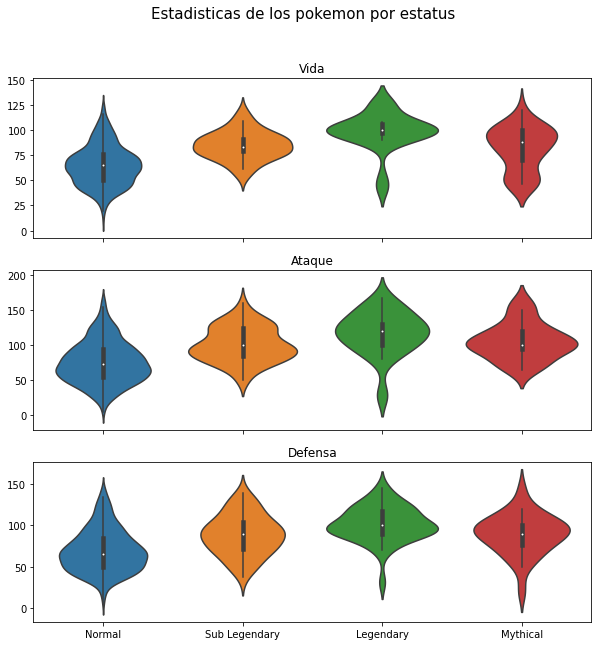

In [31]:
violinplot_categorico('status','estatus')

Es claro que los pokémon normales suelen tener las estadísticas más bajas y los legendarios las más altas, seguidos por los pokémon míticos.